In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'D:\vscfiles\jpy\datasets\Titanic\processed_train.csv')
data

,Survived,Pclass,Gender,Age,Fare,Embarked,FamilySize,Title
0,0,3,male,22.0,7.2500,S,2,Mr
1,1,1,female,38.0,71.2833,C,2,Mrs
2,1,3,female,26.0,7.9250,S,1,Miss
3,1,1,female,35.0,53.1000,S,2,Mrs
4,0,3,male,35.0,8.0500,S,1,Mr
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,1,Officer
887,1,1,female,19.0,30.0000,S,1,Miss
888,0,3,female,27.0,23.4500,S,4,Miss
889,1,1,male,26.0,30.0000,C,1,Mr


### 针对KNN模型计算距离来分类的方法，我们需要对一些特征进行变化，如标准化、归一化、离散化；独热编码等

In [3]:
# 对Pclass, Gender, Embarked, Title进行独热编码
encoded_features = pd.get_dummies(data[['Pclass', 'Gender', 'Embarked', 'Title']])

# 将独热编码的结果合并回原始DataFrame
data = pd.concat([data, encoded_features], axis=1)

# 删除原始的未编码列
data.drop(['Pclass', 'Gender', 'Embarked', 'Title'], axis=1, inplace=True)

data

,Survived,Age,Fare,FamilySize,Gender_female,Gender_male,Embarked_C,Embarked_Q,Embarked_S,Title_Elite,Title_Miss,Title_Mr,Title_Mrs,Title_Officer
0,0,22.0,7.2500,2,False,True,False,False,True,False,False,True,False,False
1,1,38.0,71.2833,2,True,False,True,False,False,False,False,False,True,False
2,1,26.0,7.9250,1,True,False,False,False,True,False,True,False,False,False
3,1,35.0,53.1000,2,True,False,False,False,True,False,False,False,True,False
4,0,35.0,8.0500,1,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,False,True,False,False,True,False,False,False,False,True
887,1,19.0,30.0000,1,True,False,False,False,True,False,True,False,False,False
888,0,27.0,23.4500,4,True,False,False,False,True,False,True,False,False,False
889,1,26.0,30.0000,1,False,True,True,False,False,False,False,True,False,False


### 下一步通过相关系数矩阵，筛选核实的特征用于模型训练

In [4]:
# 获取相关系数矩阵
corrdf = data.corr()
corrdf

,Survived,Age,Fare,FamilySize,Gender_female,Gender_male,Embarked_C,Embarked_Q,Embarked_S,Title_Elite,Title_Miss,Title_Mr,Title_Mrs,Title_Officer
Survived,1.000000,-0.073296,0.257307,0.016639,0.543351,-0.543351,0.168240,0.003650,-0.149683,0.091974,0.332795,-0.549199,0.344935,-0.031316
Age,-0.073296,1.000000,0.094161,-0.249501,-0.095256,0.095256,0.030385,-0.032994,-0.005855,-0.329372,-0.259581,0.194420,0.160119,0.179673
Fare,0.257307,0.094161,1.000000,0.217138,0.182333,-0.182333,0.269335,-0.117216,-0.162184,0.015447,0.120829,-0.183766,0.105665,0.010357
FamilySize,0.016639,-0.249501,0.217138,1.000000,0.200988,-0.200988,-0.046215,-0.058592,0.077359,0.344187,0.109271,-0.338014,0.151534,-0.040975
Gender_female,0.543351,-0.095256,0.182333,0.200988,1.000000,-1.000000,0.082853,0.074115,-0.119224,-0.148680,0.691548,-0.867334,0.552686,-0.089228
Gender_male,-0.543351,0.095256,-0.182333,-0.200988,-1.000000,1.000000,-0.082853,-0.074115,0.119224,0.148680,-0.691548,0.867334,-0.552686,0.089228
Embarked_C,0.168240,0.030385,0.269335,-0.046215,0.082853,-0.082853,1.000000,-0.148258,-0.782742,-0.006353,0.037613,-0.072567,0.066101,-0.008034
Embarked_Q,0.003650,-0.032994,-0.117216,-0.058592,0.074115,-0.074115,-0.148258,1.000000,-0.499421,0.002027,0.168720,-0.078338,-0.091121,0.012618
Embarked_S,-0.149683,-0.005855,-0.162184,0.077359,-0.119224,0.119224,-0.782742,-0.499421,1.000000,0.004290,-0.139126,0.112870,-0.000565,-0.000902
Title_Elite,0.091974,-0.329372,0.015447,0.344187,-0.148680,0.148680,-0.006353,0.002027,0.004290,1.000000,-0.117658,-0.271163,-0.094032,-0.033117


<Axes: >

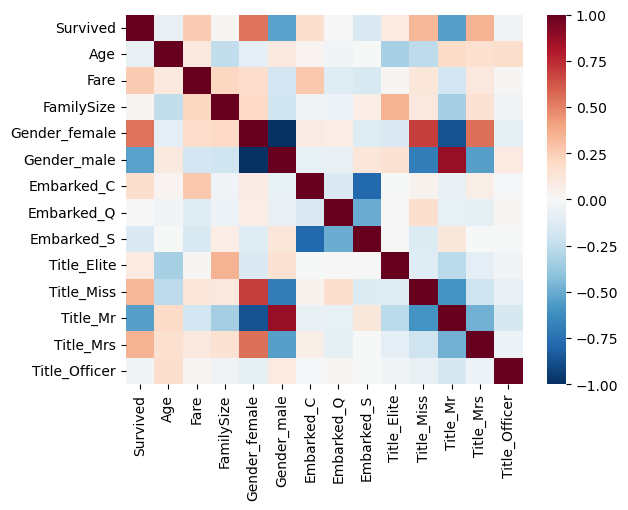

In [5]:
sns.heatmap(corrdf, cmap='RdBu_r')


### 准备一下要预测的数据集test.csv（前期已经预处理过）

In [6]:
test_data = pd.read_csv(r'D:\vscfiles\jpy\datasets\Titanic\processed_test.csv')
test_data

,Pclass,Gender,Age,Fare,Embarked,FamilySize,Title
0,3,male,34.5,7.8292,Q,1,Mr
1,3,female,47.0,7.0000,S,2,Mrs
2,2,male,62.0,9.6875,Q,1,Mr
3,3,male,27.0,8.6625,S,1,Mr
4,3,female,22.0,12.2875,S,3,Mrs
...,...,...,...,...,...,...,...
413,3,male,27.0,8.0500,S,1,Mr
414,1,female,39.0,108.9000,C,1,Elite
415,3,male,38.5,7.2500,S,1,Mr
416,3,male,27.0,8.0500,S,1,Mr


In [7]:
# 对Pclass, Gender, Embarked, Title进行独热编码
encoded_features = pd.get_dummies(test_data[['Pclass', 'Gender', 'Embarked', 'Title']])

# 将独热编码的结果合并回原始DataFrame
test_data = pd.concat([test_data, encoded_features], axis=1)

# 删除原始的未编码列
test_data.drop(['Pclass', 'Gender', 'Embarked', 'Title'], axis=1, inplace=True)

test_data

,Age,Fare,FamilySize,Gender_female,Gender_male,Embarked_C,Embarked_Q,Embarked_S,Title_Elite,Title_Miss,Title_Mr,Title_Mrs,Title_Officer
0,34.5,7.8292,1,False,True,False,True,False,False,False,True,False,False
1,47.0,7.0000,2,True,False,False,False,True,False,False,False,True,False
2,62.0,9.6875,1,False,True,False,True,False,False,False,True,False,False
3,27.0,8.6625,1,False,True,False,False,True,False,False,True,False,False
4,22.0,12.2875,3,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,27.0,8.0500,1,False,True,False,False,True,False,False,True,False,False
414,39.0,108.9000,1,True,False,True,False,False,True,False,False,False,False
415,38.5,7.2500,1,False,True,False,False,True,False,False,True,False,False
416,27.0,8.0500,1,False,True,False,False,True,False,False,True,False,False


### 下面开始训练模型

In [8]:
predictors = data.drop(['Survived'], axis=1)
target = data['Survived']
X = predictors.values
y = target.values

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [10]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=7)

In [11]:
# 特征缩放
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# 这里把后面要用到的test.csv也用上
test_data_scaled = scaler.transform(test_data)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


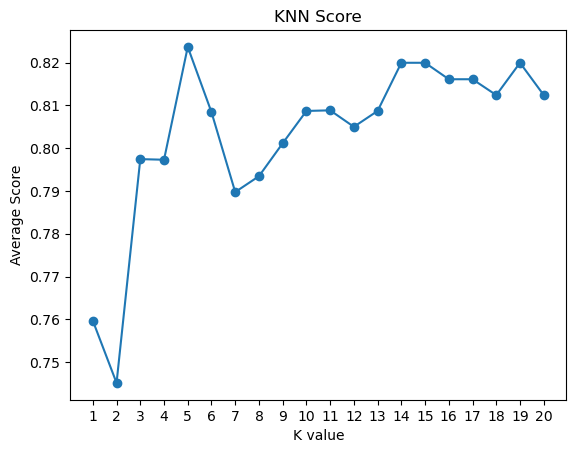

In [12]:
# 初始化KNN分类器
knn = KNeighborsClassifier()

# 网格搜索找到最优的k值
# 定义要测试的k值范围
param_grid = {'n_neighbors': list(range(1, 21))}

# 使用GridSearchCV进行交叉验证
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# 对标准化后的训练数据进行拟合
grid_search.fit(X_train_scaled, y_train)
train_scores = grid_search.cv_results_['mean_test_score']

# 绘制k值与得分的折线图
plt.plot(range(1, 21, 1), train_scores, marker='o', linestyle='-')
plt.xticks(range(1, 21, 1))
plt.xlabel('K value')
plt.ylabel('Average Score')
plt.title('KNN Score')
plt.show()

In [13]:
# 输出最佳参数和对应的分数
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best training score: {grid_search.best_score_}')

Best parameters: {'n_neighbors': 5}
Best training score: 0.8236467236467236


In [14]:
# 利用最优的k值训练模型，得到knn_best
knn_best = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
knn_best.fit(X_train_scaled, y_train)

# 对测试集进行预测
y_pred = knn_best.predict(X_test_scaled)

# 计算各种性能指标
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

# 输出性能指标
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.782051282051282
Precision: 0.7806308676977404
Recall: 0.782051282051282
F1 Score: 0.7811333773703188


              precision    recall  f1-score   support

           0       0.81      0.84      0.83       384
           1       0.73      0.70      0.71       240

    accuracy                           0.78       624
   macro avg       0.77      0.77      0.77       624
weighted avg       0.78      0.78      0.78       624

[[321  63]
 [ 73 167]]
0.782051282051282


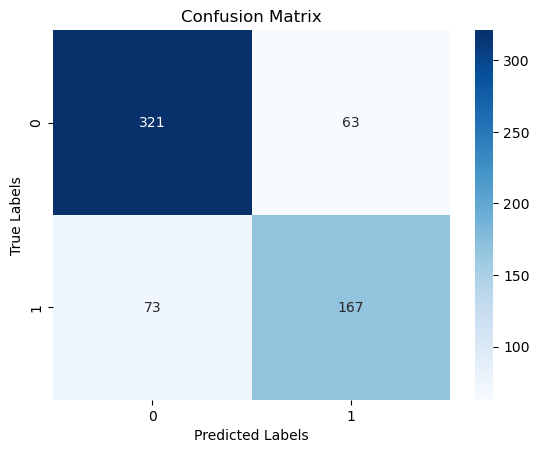

In [15]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

# 绘制混淆矩阵
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### 下面用题目给出的test数据集来试试，投到kaggle官网

In [16]:
# 使用模型进行预测
predictions = knn_best.predict(test_data_scaled)

# 输出预测结果
print(predictions)

[0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]


In [20]:
idindex = pd.read_csv(r'D:\vscfiles\jpy\datasets\Titanic\test.csv')
# 乘客id
passenger_id =  idindex['PassengerId']

# 定义一个DataFrame,接收乘客id和生存预测结果
preddf = pd.DataFrame({'PassengerId':passenger_id,
                       'Survived':predictions})
print(preddf.shape)



(418, 2)


In [21]:
preddf.to_csv('output.csv', index=False)